In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

In [2]:
! pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\asrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
i = 0
for dirname, _, fnames in os.walk('archive/train'):
    for filename in fnames:
        i += 1
print(i)

7328


In [4]:
i = 0
for dirname, _, fnames in os.walk('archive/test'):
    for filename in fnames:
        i += 1
print(i)

1841


In [5]:
for dirname, _, fnames in os.walk('archive'):
    for filename in fnames:
        #print(os.path.join(dirname, filename))
        from keras.preprocessing.image import load_img

In [6]:
width = 240
height = 240
channel = 3
train_sample = 7328
valid = 1841
category = 30

X_train = np.zeros((train_sample, height, width, channel), dtype='float32')
y_train = np.zeros((train_sample, category), dtype='int32')

X_val = np.zeros((valid, height, width, channel), dtype='float32')
y_val = np.zeros((valid, category), dtype='int32')

In [7]:
from keras.applications.mobilenet import preprocess_input

In [8]:
label_num = {'american_football':0, 'baseball':1, 'basketball':2, 'billiard_ball':3, 'bowling_ball':4, 'cricket_ball':5,
'football':6, 'golf_ball':7, 'hockey_ball':8, 'hockey_puck':9, 'rugby_ball':10, 'shuttlecock':11, 'table_tennis_ball':12, 'tennis_ball':13 ,'volleyball':14}

In [9]:
i = 0
for dirname, _, fnames in os.walk('archive/train'):
    for filename in tqdm(fnames):
        path_db = os.path.join(dirname, filename)
        images = load_img(path_db, color_mode = "rgb", target_size=(height, width))
        images = np.array(images, dtype = 'float32')
        images = preprocess_input(images)
        X_train[i,:,:,:3]  = images
        _label = dirname.split('\\')[-1]
        _index = label_num[_label]
        y_train[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
  1%|          | 3/384 [00:00<00:16, 23.59it/s]

100%|██████████| 432/432 [00:11<00:00, 36.07it/s]


In [10]:
i = 0
for dirname, _, fnames in os.walk('archive/test'):
    for filename in tqdm(fnames):
        path_db = os.path.join(dirname, filename)
        images = load_img(path_db, color_mode = "rgb", target_size=(height, width))
        images = np.array(images, dtype = 'float32')
        images = preprocess_input(images)
        X_val[i,:,:,:3]  = images
        _label = dirname.split('\\')[-1]
        _index = label_num[_label]
        y_val[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 109/109 [00:03<00:00, 29.81it/s]


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_dir = 'archive/train'
val_dir = 'archive/test'
test_dir = 'archive/test'

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='categorical', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(val_dir, batch_size=20, class_mode = 'categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(test_dir,shuffle=False, batch_size=20, class_mode = 'categorical', target_size=(220, 220))

Found 7328 images belonging to 15 classes.
Found 1841 images belonging to 15 classes.
Found 1841 images belonging to 15 classes.


In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=123)
X_val, y_val = shuffle(X_val, y_val, random_state=123)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(240,240,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
              batch_size=240,
              epochs=50,
              validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/50


: 

: 

In [ ]:
model.summary(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 107648)            0         
                                                                 
 dense (Dense)               (None, 50)                5

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

NameError: name 'plt' is not defined

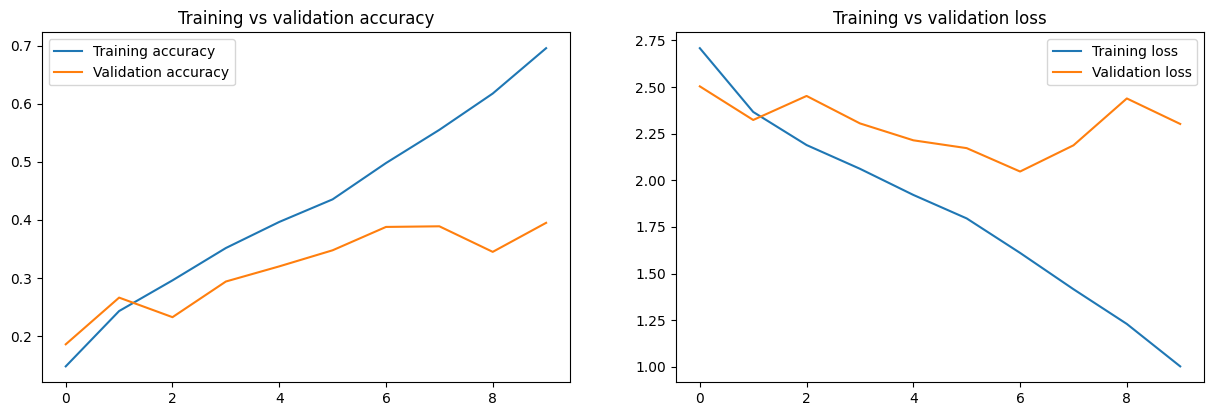

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


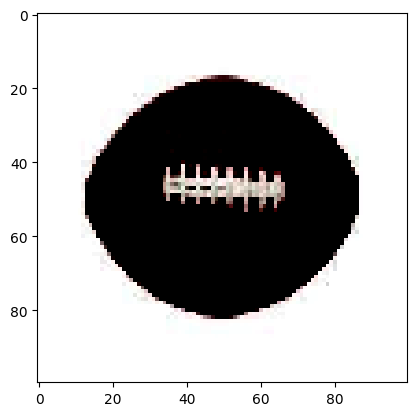

In [ ]:
path2 = 'archive/test/american_football/american_football_4.jpg'
img = load_img(path2, color_mode = "rgb", target_size=(100, 100))  
img = np.array(img, dtype = 'float32')
img = preprocess_input(img)
plt.imshow(img)
img = img.reshape(1,100,100,3)

In [ ]:
y1 = model.predict

In [ ]:
y1

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x000001B3B3AF44D0>>

In [ ]:
print(label_num[np.argmax(y1)])

KeyError: 0